Banking Domain
        Banking industry is spending massive amount of money in the marketing strategy. This needs to be made more effective by understanding the customer needs and redesigning the prodcuts available. The given problem statement is mainly focused on the phone call marketing strategy. Often more than 1 contact to same client was required, in order to access if the product (term deposit) would be "Yes" or "No". This project might enable a target customer for future marketing plans. By analyzing the customer features, the bank will be able to predict customer behavior and identify which type of customer is more likely to make the term deposits in the portuguse bank. This result will help the bank to secure their deposits effectively and increase the satisfaction by reducing the advetisment to disqualified customers
    

#Data Cleansing

Load  raw data-->Structure the data-->process the data-->Perform EDA-->Report the insights/graphs

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution . The data is retrived from UCI Machine learning Repository : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [200]:
#Import the necessary packages for finding the insights
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind,levene,shapiro,iqr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes=True
import warnings
warnings.filterwarnings('ignore')
import os
from pandas import read_csv


In [201]:
#Reading the dataset file
bank_data = pd.read_csv('bank-full.csv')

In [202]:
bank_data
#There are around 45.2k customer records in the given data set
#There 17 variables out of which 16 are input and 1 is the target variable with yes/no value
#Most of the variables are categorical variable


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [203]:
#To verify the datatypes of the all the attributes in the dataset
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [204]:
bank_data.describe()

#The mean balance is way much less than the max balance value. This shows there might be outlier


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [205]:
#To get the behavior of global statistical functions using describe
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [206]:
bank_data.dropna
#There are no null values in the dataset but there are some "unknown" values in the dataset

<bound method DataFrame.dropna of        age            job   marital  education default  balance housing loan  \
0       58     management   married   tertiary      no     2143     yes   no   
1       44     technician    single  secondary      no       29     yes   no   
2       33   entrepreneur   married  secondary      no        2     yes  yes   
3       47    blue-collar   married    unknown      no     1506     yes   no   
4       33        unknown    single    unknown      no        1      no   no   
5       35     management   married   tertiary      no      231     yes   no   
6       28     management    single   tertiary      no      447     yes  yes   
7       42   entrepreneur  divorced   tertiary     yes        2     yes   no   
8       58        retired   married    primary      no      121     yes   no   
9       43     technician    single  secondary      no      593     yes   no   
10      41         admin.  divorced  secondary      no      270     yes   no   
11    

In [207]:
# Replacing the 'unknown' to 'other'
bank_data[['job','education','contact']] = bank_data[['job','education','contact']].replace(['unknown'],'other')

In [208]:
bank_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,other,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,other,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,other,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,other,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,other,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,other,5,may,55,1,-1,0,unknown,no


In [209]:
from scipy.stats import zscore

bank_data[['balance']].mean()

bank_data['balance_outliers'] = bank_data['balance']
bank_data['balance_outliers']= zscore(bank_data['balance_outliers'])

condition1 = (bank_data['balance_outliers']>3) | (bank_data['balance_outliers']<-3 )
dataset3 = bank_data.drop(bank_data[condition1].index, axis = 0, inplace = False)

bank_df = bank_data.drop('balance_outliers', axis=1)

In [210]:
bank_df.rename(index=str, columns={'Target': 'response1'}, inplace = True)

def convert(bank_df, new_column, old_column):
    bank_df[new_column] = bank_df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return bank_df[new_column].value_counts()

convert(bank_df, "response_binary", "response1")

0    39922
1     5289
Name: response_binary, dtype: int64

In [211]:
bank_df1 = bank_df.drop('contact', axis=1)
bank_df1['duration'] = bank_df1['duration'].apply(lambda n:n/60).round(2)

In [212]:
#Droping customer calls which lasted less than 5 seconds. 
#This might not have been a proper conversation
condition2 = (bank_df1['duration']<5/60)
bank_df2 = bank_df1.drop(bank_df1[condition2].index, axis = 0, inplace = False)

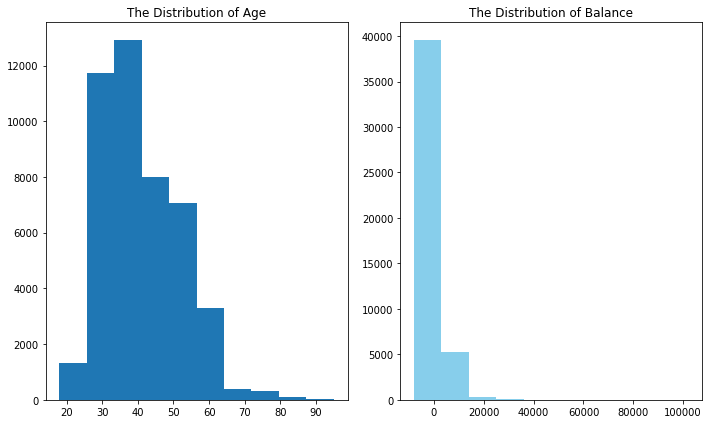

In [213]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(bank_df2['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(bank_df2['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

The distribution of age: 
In the telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s(25th-Q3 percentile. The distribution of customer age is fairly normal with a small standard deviation.

The distribution of balance: After dropping outliers in balance, the range of balance is still massive, from a negative value to a maximum of 16000 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

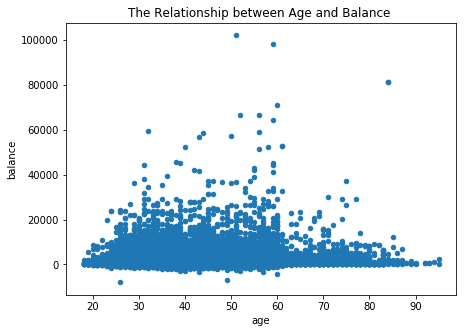

In [214]:
scatter_age_balance = bank_df2.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()
#Customers with age >=60, have a lower income base

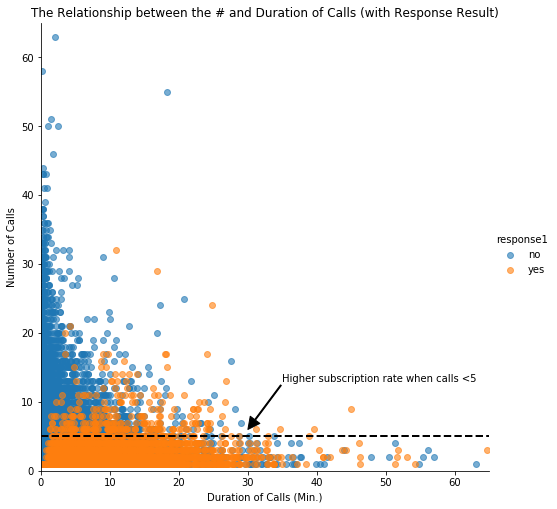

In [215]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = bank_df2,
                     hue = 'response1',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Min.)')
plt.title('The Relationship between the # and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction

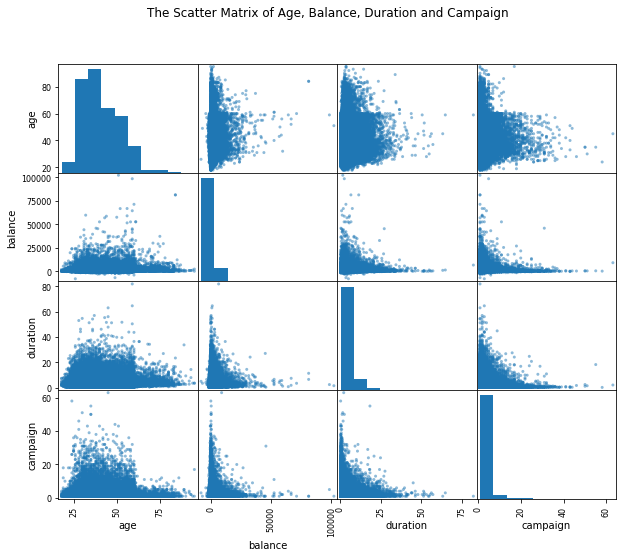

In [216]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(bank_df2[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

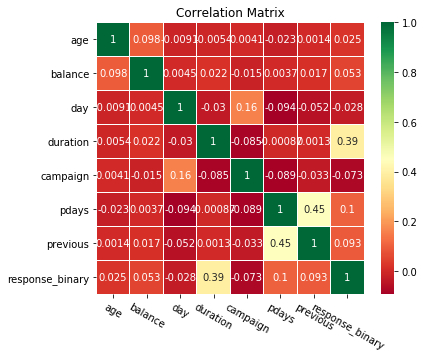

In [217]:
bank_df_corr = bank_df2.corr()
bank_df_corr = sns.heatmap(bank_df_corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Correlation matrix  plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”.

In [218]:
lst = [bank_df2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [219]:
lst = [bank_df2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

Text(0.5, 1.0, 'The Subscription Rate of Different Balance Levels in Each Age Group')

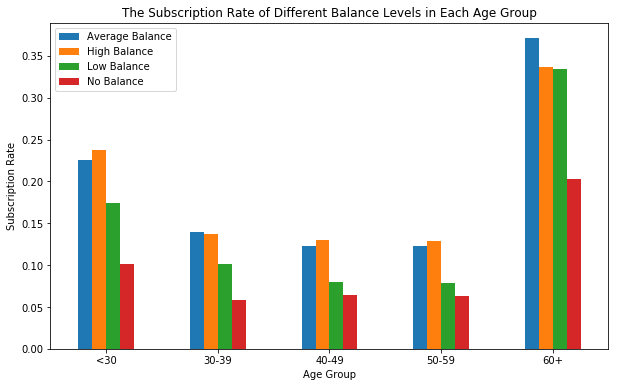

In [220]:
age_balance1 = pd.DataFrame(bank_df2.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(bank_df2.groupby(['age_group','balance_group'])['response1'].count())

age_balance1['response1'] = age_balance2['response1']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response1'])
age_balance1 = age_balance1.drop(['response_binary','response1'],axis =1)

age_balance1 = age_balance1.unstack()

age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')

The interest in subscription for deposit is exceptionally high for people aged above 60 and younger people aged below 30 also have a distinguishable higher subscription rate than those of other age groups.

The effect of balance levels on subscription decision is applicable to each individual age group: every age group shares a common trend that the percentage of subscription increases with balance.

In [221]:
#bank_data = bank_data.drop(['Unnamed: 0'], axis=1)

bank_df2.drop(['marital'],axis=1, inplace=True)


In [222]:
dataset1 = bank_df2.iloc[:, 0:7]

In [192]:
#Changing categoical to dummy varaible

dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
bank_df2_response = pd.DataFrame(bank_df2['response_binary'])
dataset2 = pd.merge(dataset2, bank_df2_response, left_index = True, right_index = True)dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_other,education_primary,education_secondary,education_tertiary,response_binary
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,35,0,231,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,28,0,447,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,42,1,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,58,0,121,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,43,0,593,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [193]:
array = dataset2.values
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results_c = []
names_c = []
for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')    
   
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.884078 (0.003638)
KNN: 0.874083 (0.004167)
CART: 0.834076 (0.006617)
NB: 0.824386 (0.008316)


In [196]:
dataset4 = bank_df2.drop(['response_binary'],axis = 1)
dataset4['duration'] = bank_data['duration']

array = dataset4.values
X = array[:,0:15]
Y = array[:,15]

test_size= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)


In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

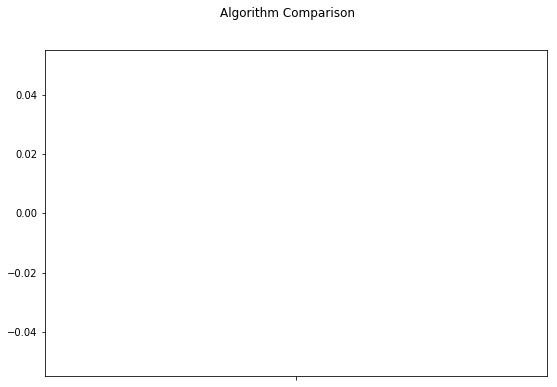

In [199]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

predictions = LR.predict(X_test)

print(accuracy_score(Y_test, predictions))
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

 Main objective of the portuguse bank project was to increase the effectiveness of the telemarketing campaign. This was successful through our data analysis. The target customer profile was established while classification/regression models were built to predict customers response for term deposit in the bank

The most responsive customers possess these features:

   Feature A: age < 30 or age > 60
   Feature B: a balance of more than 5000 euros
  
  By Logisitic algorithm, the bank will be able to predict the customer response to telemarketing campaign before calling its customer. Bank will have to call only to those customers who are more likely to get the term deposits & make less call/ignore to the customers who are unlikely to make the deposits
  When implementing the startegy, the time of calling should be cosnidered as the analysis had shown that the calls in few months had more success rate. Also we cant judge the result by few data, we might need to analyse huge amount of data for better results
  